### <center><b>Data Science with Python</b></center>
###  <center><b>USA Statistics</b></center>

#### Importing all the required libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus
import plotly.plotly as py
from plotly.graph_objs import *
pd.set_option('display.max_columns', None)
pd.set_option('precision', 2)
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly

Populating the interactive namespace from numpy and matplotlib


In [2]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")

#### Reading the dataset and creating a dataframe for it:

In [3]:
df = pd.read_csv("real_estate_db.csv", encoding = 'latin-1')

In [4]:
print(df.shape)

(39030, 76)


## Cleaning the dataset:
<b>Lets remove the unnecessary columns that we aren't going to analyze on.

In [5]:
df_useful = df.drop([col for col in df if ('hc_' in col ) or ('sample_weight' in col) or ('ALand' in col) or
                    ('BLOCKID' in col) or ('cdf' in col) or ('stdev' in col) or ('median' in col) or
                    ('pct' in col) or ('gt_2' in col) or ('gt_4' in col) or ('gt_35' in col) or
                    ('gt_15' in col) or ('SUMLEVEL' in col) or ('_snp' in col) or (col.startswith('u'))], axis=1)

<b>Handling the NaNs:

In [6]:
df_useful.fillna(0, inplace = True)

<b>Converting to lower case:

In [7]:
df_useful.columns = [x.lower() for x in df_useful.columns]

#### Removing outliers from required columns:

In [8]:
h = df_useful["hi_mean"].quantile(0.99)

In [9]:
df_useful = df_useful[df_useful["hi_mean"] < h]

In [10]:
r = df_useful["rent_mean"].quantile(0.99)

In [11]:
df_useful = df_useful[df_useful["rent_mean"] < r]

In [12]:
m = df_useful["married"].quantile(0.99)

In [13]:
df_useful = df_useful[df_useful["married"] < m]

In [14]:
p = df_useful["pop"].quantile(0.99)

In [15]:
df_useful = df_useful[df_useful["pop"] < p]

In [16]:
print(df_useful.shape)

(37490, 38)


#### Lets visualize an important feature - Type:

In [17]:
percents = df_useful["type"].value_counts().round(2)

print("Type Count Values: ")
print(percents)

types = df_useful["type"].value_counts() / len(df_useful["type"]) * 100

labels = types.index.values.tolist()
values = types.tolist()

trace1 = go.Pie(labels=labels, values=values,hoverinfo='label+percent', marker=dict(line=dict(color='#000000', width=1)))

layout = go.Layout(title='Distribuition of Types', legend=dict(orientation="h"));

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

Type Count Values: 
City       20823
CDP         5016
Town        4994
Village     4456
Borough     1713
Urban        488
Name: type, dtype: int64


<div class="alert alert-success">
<b>As we can see we have major rows of cities and towns so lets take a new dataset containing only town and city records
</div>

#### Creating dataset containing records belonging to cities and towns only:

In [18]:
df_ct = df_useful[(df_useful.type == 'City') | (df_useful.type == 'Town')]

#### Creating bins:

In [19]:
df_bins = df_ct.copy()

In [20]:
df_bins['married'] = pd.cut(df_bins.married, bins=4,include_lowest=True)

In [21]:
df_bins['some_type_of_debt'] = pd.cut(df_bins.debt, bins=4,include_lowest=True)

In [22]:
df_bins['high_school_degree'] = pd.cut(df_bins.hs_degree, bins=10,include_lowest=True)

In [23]:
df_bins['rent'] = pd.cut(df_bins.rent_mean, bins=10,include_lowest=True)

In [24]:
df_bins['household_income'] = pd.cut(df_bins.hi_mean, bins=[5000, 30000, 63000, 90000, 300000],include_lowest=True)

In [25]:
df_bins['home_equity'] = pd.cut(df_bins.home_equity, bins=[0.0,0.2,0.4,0.6,0.8,1.0],include_lowest=True)

#### Creating another dataset with only non-string values:

In [26]:
df_no_strings = df_useful.iloc[:,9:]

#### Analyzing the variations in the rent prices using world map:
<b>According to our dataset , we have latitude and longitude for each record. So lets see the rent prices for each county.

In [27]:
import plotly.figure_factory as ff
import numpy as np

In [28]:
mapbox_access_token = 'pk.eyJ1Ijoia3J1dGlrYWFtYnZhbmUiLCJhIjoiY2poZmoxMjBjMTZ4aTM2bmduYnZtYXlrZCJ9._NLH_EGbJpqz3VR-rLv1mw'

In [29]:
plotly.tools.set_credentials_file(username='krutika.a', api_key='iSsK12rHGuumSjzRhYDF')

In [30]:
plot = df_useful.copy()
plot['State FIPS Code'] = plot['stateid'].apply(lambda x: str(x).zfill(2))
plot['County FIPS Code'] = plot['countyid'].apply(lambda x: str(x).zfill(3))
plot['FIPS'] = plot['State FIPS Code'] + plot['County FIPS Code']
plot.fillna(0, inplace=True)

In [31]:
map_us = plot.groupby('FIPS')[['FIPS', 'rent_mean']].mean().reset_index()

In [32]:
colorscale1 = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]

colorscale = [
    'rgb(68.0, 1.0, 84.0)',
    'rgb(66.0, 64.0, 134.0)',
    'rgb(38.0, 130.0, 142.0)',
    'rgb(63.0, 188.0, 115.0)',
    'rgb(216.0, 226.0, 25.0)'
    'rgb(223.0, 223.0, 33.0)'
    'rgb(192.0, 226.0, 57.0)'
    'rgb(226.0,204.0,57.0)',
    'rgb(226.0,169.0,25.0)',
    'rgb(222.0,90.0,25.0)',
]
endpts = list(np.linspace(map_us['rent_mean'].min(), map_us['rent_mean'].max(), len(colorscale) - 1))
fips = map_us['FIPS'].tolist()
values = map_us['rent_mean'].tolist()

In [33]:
fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='Rent by county in United States ',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    legend_title='rent in United States',
)

In [34]:
py.iplot(fig, filename='choropleth_full_usa')

The draw time for this plot will be slow for clients without much RAM.


<b>The above map shows the distribution of rent and helps us to visualize which locations have concentration of higher rent prices.<br>
So we have found that specific counties in California and NewYork have the highest rent prices
eg - Santa Clara County of California

## <b>Finding 1:</b> rent vs debt

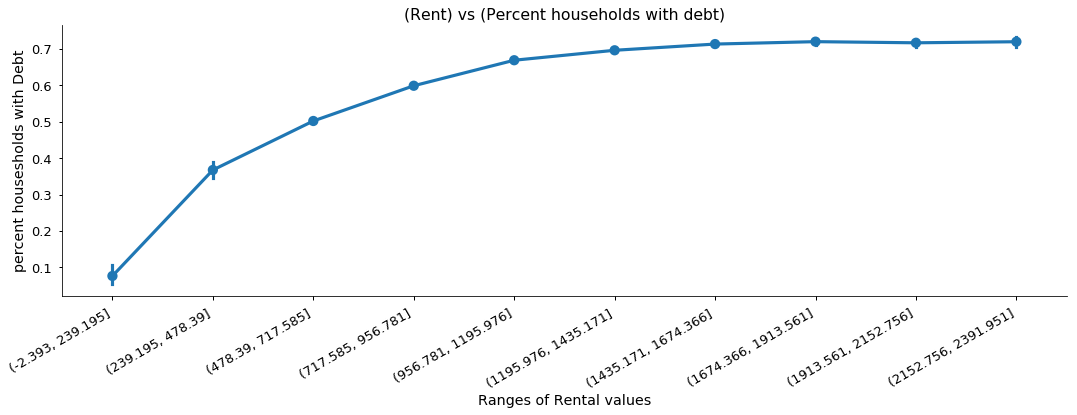

In [35]:
import matplotlib.pyplot as pyplt
sns.set_context("notebook", font_scale=1.3)


f, ax = pyplot.subplots(figsize=(18, 5))
fig = sns.pointplot(x='rent', y='debt', data=df_bins, ax=ax)
pyplt.xlabel('Ranges of Rental values')
pyplt.ylabel('percent housesholds with Debt')
pyplt.title('(Rent) vs (Percent households with debt)')
sns.despine() #to remove top and right line on graph
pyplt.xticks(rotation=30, ha='right')

pyplt.show(fig);

<div class="alert alert-success">
<b>In real world, we wont expect rent and debt to have any correlation. However, from the above graph we can interpret that locations with higher mean rent have higher percentage of houses with debt. 
</div>

In [36]:
df_bins.groupby('state')['state'].count().nlargest(10)

state
California    3882
Texas         2595
New York      2467
Florida       2154
Georgia       1023
New Jersey     949
Virginia       911
Indiana        789
Washington     786
Tennessee      770
Name: state, dtype: int64

<div class="alert alert-success">
<b>As we can see, this dataset has largest records for the state of California. So lets study a little about this state.
</div>

### Creating a dataset containing records belonging only to the state of California:

In [37]:
df_cali = df_bins[(df_bins.state == 'California')]

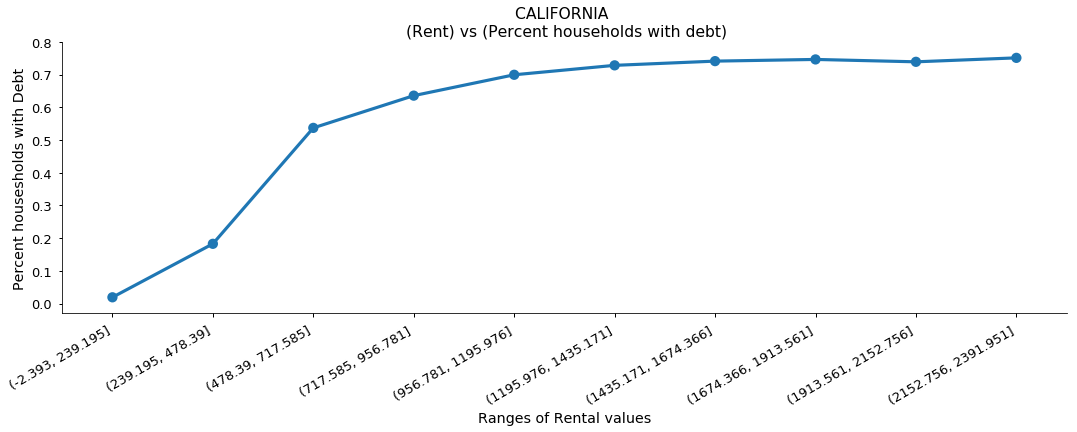

In [38]:
sns.set_context("notebook", font_scale=1.3)
f, ax = pyplot.subplots(figsize=(18, 5))
fig = sns.pointplot(x='rent', y='debt', data=df_cali, ci = None, ax=ax)
pyplt.xlabel('Ranges of Rental values')
pyplt.ylabel('Percent housesholds with Debt')
pyplt.title('CALIFORNIA \n (Rent) vs (Percent households with debt)')
sns.despine() #to remove top and right line on graph
pyplt.xticks(rotation=30, ha='right')
pyplt.show(fig);


<div class="alert alert-success">
<b>Here we just focused on one state - California. We observe similar correlation between mean rent and percentage of houses having debts.
</div>

<b>Lets search for top 5 states with largest mean rent and largest percentage of houses with debt.

In [39]:
df_bins.groupby('state')['debt'].mean().nlargest(5) 

state
District of Columbia    0.78
California              0.71
Massachusetts           0.70
Colorado                0.69
Washington              0.68
Name: debt, dtype: float64

In [40]:
df_bins.groupby('state')['rent_mean'].mean().nlargest(5)

state
California              1380.42
New Jersey              1321.75
District of Columbia    1312.28
Massachusetts           1187.72
New York                1185.01
Name: rent_mean, dtype: float64

<div class="alert alert-success">
<b>This also supports our conclusion that the states having highest rents also have highest percentages of household with debts.
</div>

<b>Now, lets examine the reason behind people having higher rents. Lets see if the type of the place people reside in, matters.

In [41]:
df_bins.groupby('type')['pop'].sum()

type
City    89475826
Town    22643329
Name: pop, dtype: int64

In [42]:
df_bins.groupby('type')['rent_mean'].mean() 

type
City    1057.75
Town     988.17
Name: rent_mean, dtype: float64

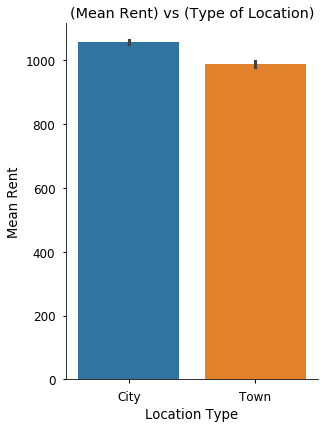

In [43]:
sns.set_context("notebook", font_scale=1.2)
fig = sns.factorplot(x='type',y='rent_mean',data=df_bins,kind='bar', size=6, aspect=0.8)
pyplt.xlabel('Location Type')
pyplt.ylabel('Mean Rent')
pyplt.title('(Mean Rent) vs (Type of Location)')

sns.despine() 
pyplt.show(fig);

## Conclusion :


<div class="alert alert-success">
<b>As we can see from above, the population is highest in cities resulting in an increase in demands, further leading to higher rent prices there compared to towns.
</div>

***

## Finding 2:   rent vs income

<h3> <b>Now lets explore the reason as to why these people from cities can afford higher rents. </h3>

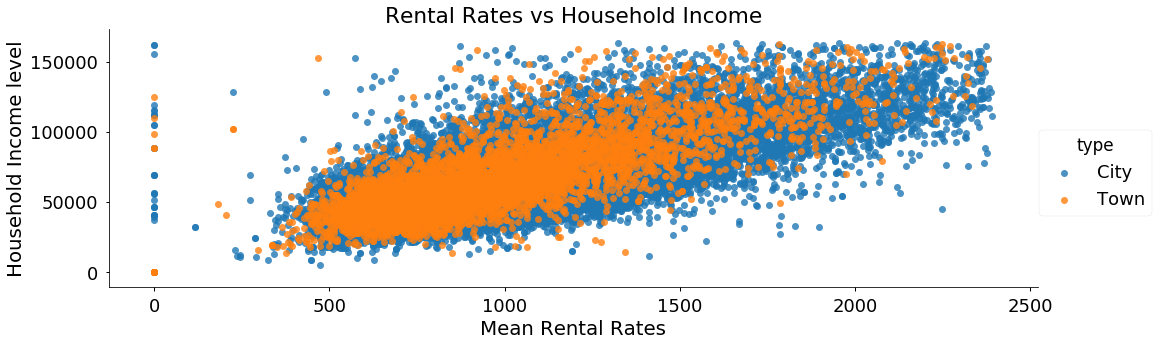

In [44]:
sns.set_context("notebook", font_scale=1.8)
fig = sns.lmplot(x='rent_mean', y='hi_mean', data=df_bins,    
           fit_reg=False,
           hue='type', aspect = 3)   
pyplt.xlabel('Mean Rental Rates')
pyplt.ylabel('Household Income level')
pyplt.title('Rental Rates vs Household Income')
sns.despine() #to remove top and right line on graph
pyplt.show(fig);

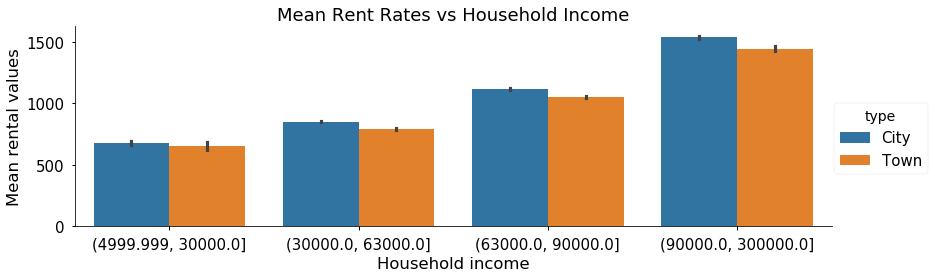

In [45]:
sns.set_context("notebook", font_scale=1.5)
sns.factorplot(x='household_income',y='rent_mean',hue='type',data=df_bins,kind='bar',aspect = 3)
pyplt.xlabel('Household income')
pyplt.ylabel('Mean rental values')
pyplt.title('Mean Rent Rates vs Household Income')
pyplt.show(fig);

<div class="alert alert-success">
<b>From above, we can conclude that as the mean household income goes on increasing, the mean rent prices also go on increasing. We can also deduce that the people from city have more household income and more rent than the town people.
<br>   
<b>This above graph also confirms the same that higher income areas have higher rents.
</div>

#### Lets try to predict the rent prices for cities and towns using Linear Regression:
We will use **Simple Regresssion** as we are going to predict only one variable.

**Step 1.** Importing the required libraries:</div>

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

**Step 2.** Create X and Y: <br>
>Our Y will be the rent prices that we are going to predict.

In [47]:
X = df_no_strings.drop('rent_mean',axis = 1)
Y = df_no_strings.rent_mean

**Step 3.** Split the data into train and test data: <br>
>We have made our train data as 75% of the original data and test data as 25%. We have randomized the splitting by using random state and given labels to both our data.


In [48]:
train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [49]:
train_features.shape

(28117, 28)

**Step 4.** Instantiate and fit our data the model:

In [50]:
rf = LinearRegression()
rf.fit(train_features, train_labels);

**Step 5.** Check score of our model on test data:

In [51]:
rf.score(test_features, test_labels)

0.7126865380270503

**Step 6.** Calculate the error rates:

In [52]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)

In [53]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars')

Mean Absolute Error: 150.64 dollars


In [54]:
print('Root Mean square error:', sqrt(round(np.mean(errors), 2)), 'dollars')

Root Mean square error: 12.273548794053006 dollars


**Step 5:** Plotting graph: <br>
> Let's visualize the predicted values vs the measured values.

In [55]:
predicted = cross_val_predict(rf, train_features, train_labels, cv=10)

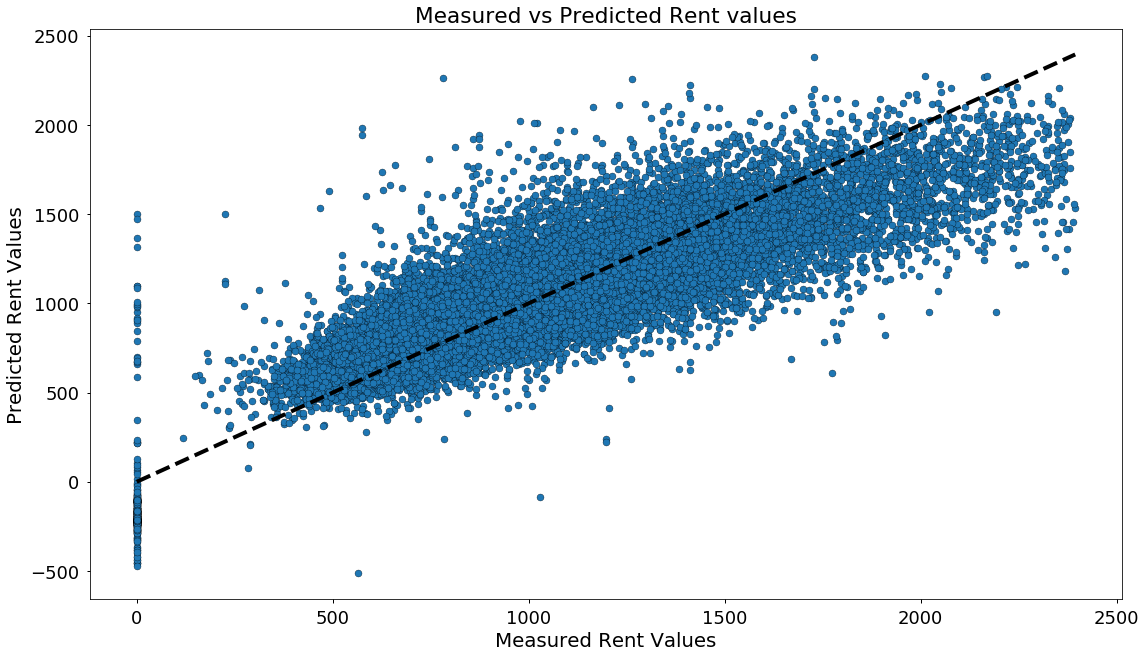

In [56]:
sns.set_context("notebook", font_scale=1.8)
y = train_labels
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured Rent Values')
ax.set_ylabel('Predicted Rent Values')
plt.title('Measured vs Predicted Rent values')
plt.show();

<div class="alert alert-success">
<b>The accuracy of the predicted rent is ```0.71.``` We can see the upward trend and the points aligned with the linear function line.
</div>

## Conclusion:

<div class="alert alert-success">
Variables that **highly contribute** to **rent** : **[ household income, debt, home equity, highschool degree, second mortgage ] **
<br><br>
<hr/>
<b>We can conclude this because using these factors, we trained the above model and it is able to predict rent with accuracy of ```71%.```
<b>We can come to this conclusion by also looking at the heat map plotted below which shows us the variables with good correlation.
</div>

### Finding the correlation and important variables:

In [57]:
df_corr = df_no_strings.dropna()

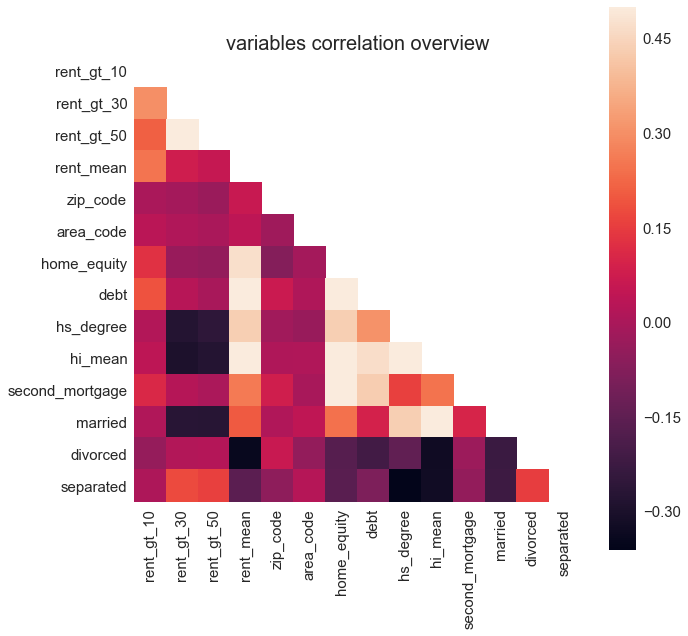

In [58]:
data_1 = ['rent_gt_10','rent_gt_30','rent_gt_50', 'rent_mean','zip_code','area_code']
data_2 = ['home_equity', 'debt', 'hs_degree','hi_mean' , 'second_mortgage']
data_3 = ['married','divorced','separated'] 


# create df_corr dataframe & drop all nans:
data = data_1 + data_2 + data_3
df_corr = df_no_strings[data].dropna()
df_corr[data] = df_corr[data].apply(lambda x: (x - np.mean(x))/np.std(x))
corrmat = df_corr.corr(method='spearman')


# Draw the heatmap using seaborn
f = plt.figure(figsize=(10, 10))
sns.set(font_scale= 1.5,rc={"font.size": 2.1})
mask = np.zeros_like(corrmat); mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"): ax = sns.heatmap(corrmat, mask=mask, vmax=0.5, square=True)
plt.title("variables correlation overview", fontsize=20); plt.show();

------------------------------------------------------------------------------------------------------------

## Finding 3: high school degree vs family mean income

<h3> Plotting the relation between the percentage of people with atleast high school degree and family mean income.

In [59]:
state_count = df_bins.groupby('state')['hs_degree'].median().nlargest(10)
trace0 = go.Box(
    x=df_useful[df_useful.state.isin(state_count.index.values)]['state'],
    y=df_useful[df_useful.state.isin(state_count.index.values)]['hs_degree'],
    name="Top 10", showlegend=False
)

In [60]:
#Second plot
hs_degree_count = df_bins.groupby('state')['family_mean'].median().nlargest(10)
trace1 = go.Box(
    x=df_useful[df_useful.state.isin(hs_degree_count.index.values)]['state'],
    y=df_useful[df_useful.state.isin(hs_degree_count.index.values)]['family_mean'],
    name="Top 10", showlegend=False
)


In [61]:
#Creating the grid
fig = tls.make_subplots(rows=1, cols=2, specs=[[{}, {}]],
                          subplot_titles=('Top 10 States with maximum high school degree median',
                                          'Top 10 States with maximum family median'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(showlegend=True, title="Relation between high school degree median and family median")
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [62]:
df_bins.groupby('state')['hs_degree'].median().nlargest(10)

state
Colorado         0.94
Wyoming          0.93
Utah             0.93
Minnesota        0.93
Alaska           0.93
Iowa             0.92
Massachusetts    0.92
Washington       0.92
Wisconsin        0.92
Maine            0.92
Name: hs_degree, dtype: float64

In [63]:
df_bins.groupby('state')['family_mean'].median().nlargest(10)

state
New Jersey              96729.45
Massachusetts           95323.58
Alaska                  90645.53
District of Columbia    86362.37
North Dakota            82097.12
Minnesota               81345.61
Colorado                81332.06
Washington              79547.80
New York                79510.76
Wyoming                 78889.81
Name: family_mean, dtype: float64

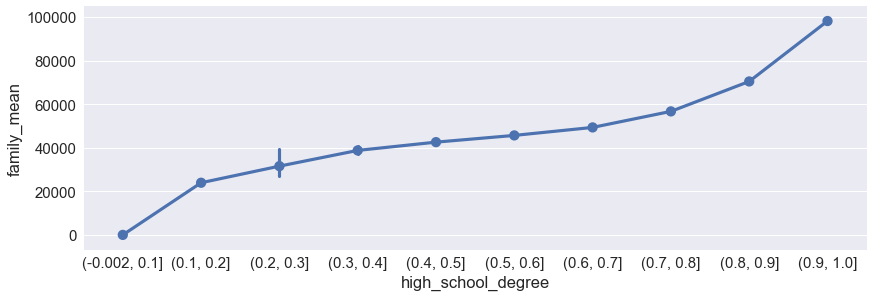

In [64]:
sns.factorplot(x='high_school_degree',y='family_mean',data=df_bins,kind='point',aspect = 3)

## Conclusion:

<div class="alert alert-success">
Most of the states who have higher percentage of people with atleast high school degree, have a higher family mean income.
</div>